In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Download from Gdirve Then Unzip

In [2]:
!gdown 18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ

Downloading...
From: https://drive.google.com/uc?id=18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ
To: /content/bank-data.zip
100% 516k/516k [00:00<00:00, 128MB/s]


In [3]:
!unzip bank-data.zip

Archive:  bank-data.zip
   creating: bank-data/
  inflating: __MACOSX/._bank-data    
  inflating: bank-data/.DS_Store     
  inflating: __MACOSX/bank-data/._.DS_Store  
  inflating: bank-data/bank-full.csv  
  inflating: __MACOSX/bank-data/._bank-full.csv  


In [4]:
data = pd.read_csv("bank-data/bank-full.csv", delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Lets Explore the dataset

In [5]:
data.shape

(45211, 17)

Categorical Features

In [6]:
categoricalFeatures = [feature for feature in data.columns if ((data[feature].dtypes=='O')&(feature not in ['y']))]
print('Total Categorical Features are : {}'.format(len(categoricalFeatures)))
categoricalFeatures

Total Categorical Features are : 9


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

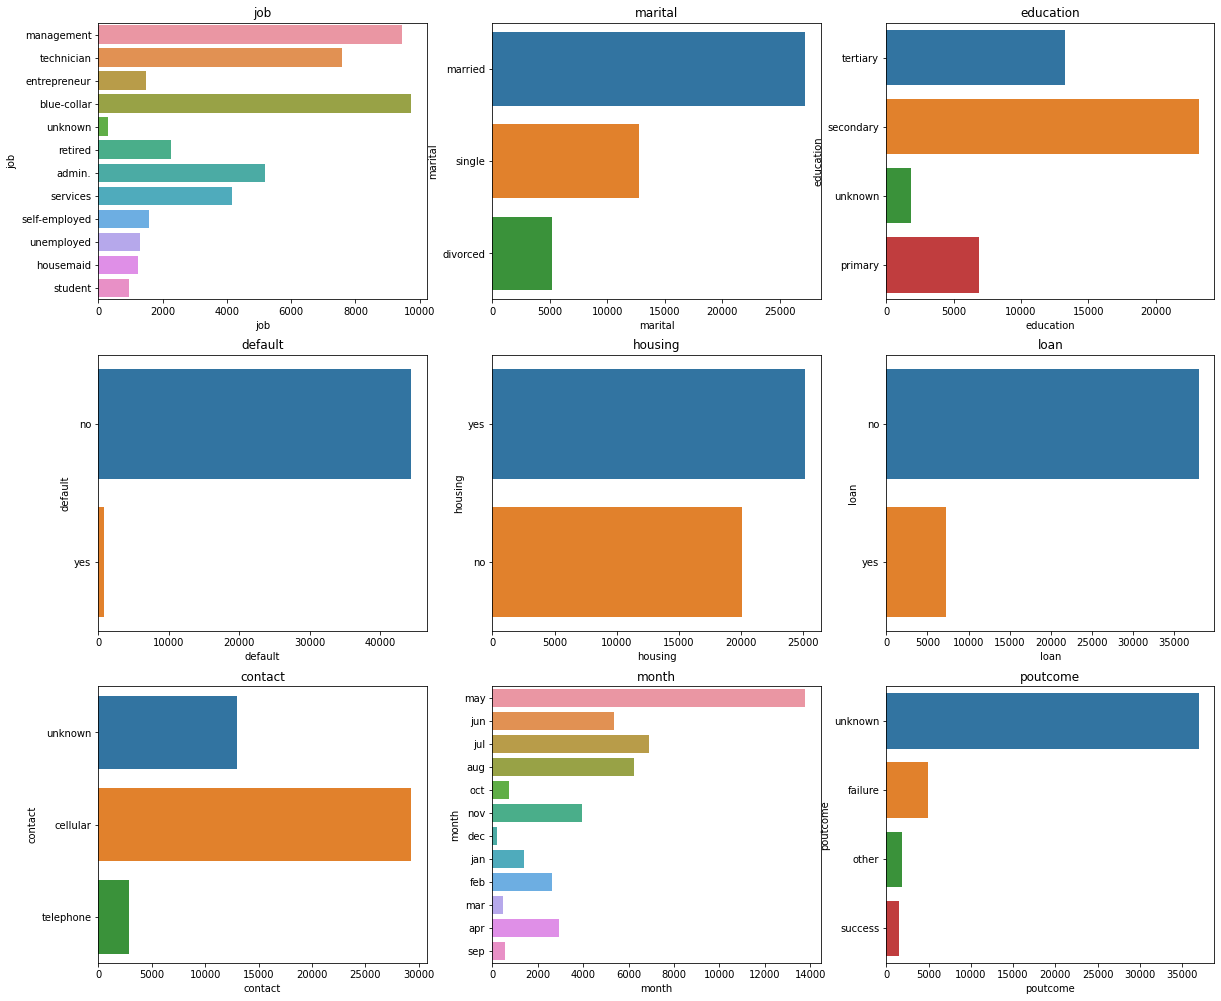

In [7]:
# Categorical Features Distribution
plt.figure(figsize=(20,60))
plotnumber =1
for categoricalFeature in categoricalFeatures:
    ax = plt.subplot(10,3,plotnumber)
    sns.countplot(y=categoricalFeature,data=data)
    plt.xlabel(categoricalFeature)
    plt.title(categoricalFeature)
    plotnumber+=1
plt.show()

## Exploring the Numerical Features

In [9]:
numericalFeatures = [feature for feature in data.columns if ((data[feature].dtypes!='O')&(feature not in ['y']))]
print('Total Numerical Features are : {}'.format(len(numericalFeatures)))
numericalFeatures

Total Numerical Features are : 7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
plt.figure(figsize=(20,60))
plotnumber =1
for numericalFeature in numericalFeatures:
    ax = plt.subplot(10,4,plotnumber)
    # sns.countplot(y=numericalFeature,data=data)
    sns.distplot(data[numericalFeature])
    plt.xlabel(numericalFeature)
    plt.title(numericalFeature)
    plotnumber+=1
plt.show()

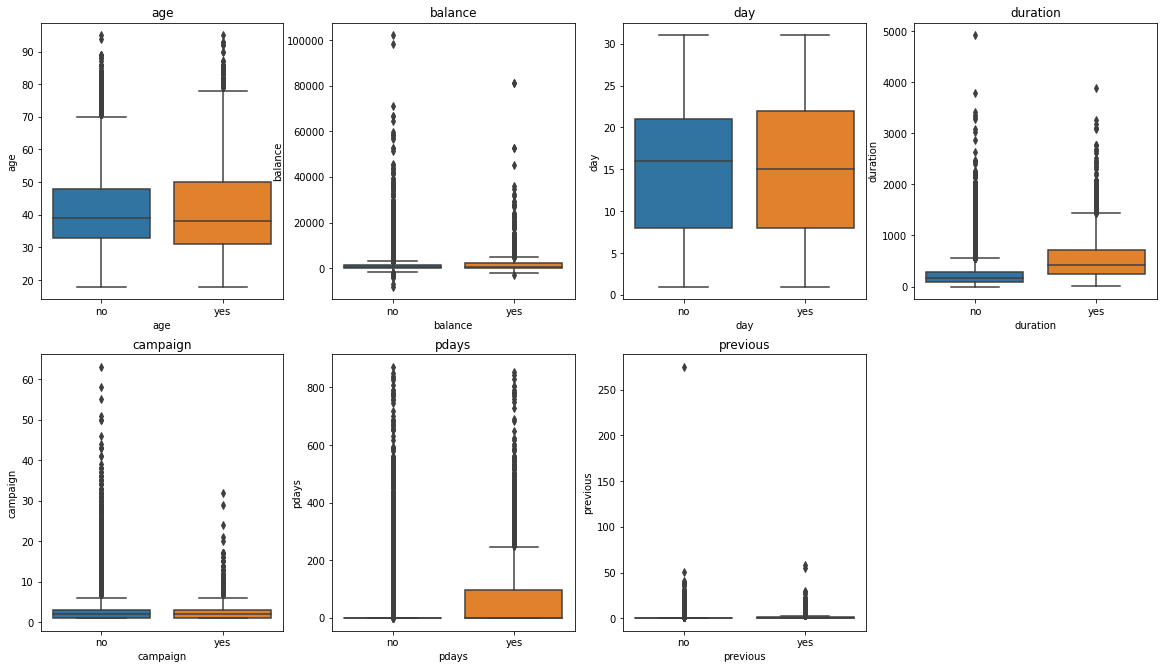

In [11]:
#Relationship between Numerical Features and Label Y
plt.figure(figsize=(20,60))
plotnumber =1
for numericalFeature in numericalFeatures:
    ax = plt.subplot(10,4,plotnumber)
    sns.boxplot(x='y', y=data[numericalFeature], data = data)
    plt.xlabel(numericalFeature)
    plt.title(numericalFeature)
    plotnumber+=1
plt.show()

In [13]:
data['y'].groupby(data['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

# Feature Engineering

## Delete Some features which are not important

In [14]:
data2 =data.copy()
data2.shape

(45211, 17)

## Delete "**default**" and  "**pdays**"

In [ ]:
data2.groupby(['y','default']).size()
data2.drop(['default'],axis=1, inplace=True)
data2.groupby(['y','pdays']).size()
data2.drop(['pdays'],axis=1, inplace=True)

## Converting categorical into numerical Features



In [19]:
catagoricalColumns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  catagoricalColumns:
    data2 = pd.concat([data2.drop(col, axis=1),pd.get_dummies(data2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

##Converting binary calategorical Features into numerical Features

In [20]:

boolColumns = ['housing', 'loan', 'y']
for col in  boolColumns:
    data2[col+'New']=data2[col].apply(lambda x : 1 if x == 'yes' else 0)
    data2.drop(col, axis=1, inplace=True)

In [21]:
data2.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housingNew,loanNew,yNew
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Split Dataset

In [22]:
X = data2.drop(['yNew'],axis=1)
Y = data2['yNew']
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2, random_state=0)
print("Training data =",len(trainX), "\n For Testing data =",len(testX))

 For Training data = 36168 
 For Testing data = 9043


In [30]:
X_train,y_train ,X_test,y_test=trainX,trainY,testX,testY

# Train Model

## SVM with default Hyper Parameters

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
predictY=svc.predict(X_test)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))

0.8830034280659074
[[7974    6]
 [1052   11]]
              precision    recall  f1-score   support

           0    0.88345   0.99925   0.93779      7980
           1    0.64706   0.01035   0.02037      1063

    accuracy                        0.88300      9043
   macro avg    0.76525   0.50480   0.47908      9043
weighted avg    0.85566   0.88300   0.82994      9043



## LinearSVC and C=.55

In [33]:
# Here, We have use LinearSVC for building our model
modelSVC= LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001,C=0.55, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=42, max_iter=1000)
modelSVC.fit(trainX,trainY)

predictY=modelSVC.predict(testX)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))

0.892734711931881
[[7871  109]
 [ 861  202]]
              precision    recall  f1-score   support

           0    0.90140   0.98634   0.94196      7980
           1    0.64952   0.19003   0.29403      1063

    accuracy                        0.89273      9043
   macro avg    0.77546   0.58818   0.61799      9043
weighted avg    0.87179   0.89273   0.86579      9043



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## SVM with rbf kernel and C=100.0

In [34]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
predictY=svc.predict(X_test)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))

0.8824505142098861
[[7936   44]
 [1019   44]]
              precision    recall  f1-score   support

           0    0.88621   0.99449   0.93723      7980
           1    0.50000   0.04139   0.07646      1063

    accuracy                        0.88245      9043
   macro avg    0.69310   0.51794   0.50684      9043
weighted avg    0.84081   0.88245   0.83605      9043



## SVM with polynomial kernel and C=1.0

In [ ]:
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(X_train,y_train)

predictY=poly_svc.predict(X_test)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))


## SVM with polynomial kernel and C=1.0

In [ ]:
poly_svc=SVC(kernel='poly', C=100.0) 
poly_svc.fit(X_train,y_train)

predictY=poly_svc.predict(X_test)

print(accuracy_score(testY,predictY))
print(confusion_matrix(testY,predictY))
print(classification_report(testY,predictY,digits=5))
